# Homework
---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

\begin{align*}
P(p \mid q) &= \frac{P(q \mid p)P(p)}{P(q)} \\
&= \frac{P(q \mid p)P(p)}{P(q \mid p)P(p) + P(q \mid \neg p)P(\neg p)} \\
&= \frac{0.6 \times 0.9}{0.6 \times 0.9 + 0.3 \times 0.1} \\
&= 0.947
\end{align*}




Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

We express the joint as the product of the likelihood and the prior, substituting the multinomial and Dirichlet distributions for both:

\begin{align*}
p(\theta, x) &= p(x | \theta, n) \cdot p(\theta | \boldsymbol{\alpha}) \\
&= \frac{n!}{x_1! x_2!... x_k!} \prod^{k}_{i=1} \theta_i^{x_i} \cdot \frac{1}{B (\boldsymbol{\alpha})} \prod^{k}_{i=1} \theta^{\alpha_i - 1}_k \\
&= \frac{n!}{x_1! x_2!... x_k!} \cdot \frac{1}{B (\boldsymbol{\alpha})} \cdot \prod^{k}_{i=1} \theta^{x_i + \alpha_i - 1}_k
\end{align*}

Since the posterior is proportional to the joint, we ignore the constants that don't depend on $\theta$, leaving us with the posterior:

\begin{align*}
p(\theta|x,n,\boldsymbol{\alpha}) \propto \prod^{k}_{i=1} \theta^{x_i + \alpha_i - 1}_i = \theta^{x_1 + \alpha_1 - 1}_1 \theta^{x_2 + \alpha_2 - 1}_2 ... \theta^{x_k + \alpha_k - 1}_k
\end{align*}

The posterior belongs to the Dirichlet distribution because the Dirichlet is a conjugate prior for the multinomial likelihood. After updating the parameters:

$$p(\theta|x,n,\boldsymbol{\alpha}) \in \texttt{Dirichlet}(\alpha + x)$$



Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial, dirichlet
import ternary  # For ternary plots

# Set random seed for reproducibility
np.random.seed(42)

# Define Multinomial parameters
n_trials = 100  # Number of trials
theta = [0.2, 0.5, 0.3]  # Probabilities for the three categories

# Sample from the Multinomial distribution
sample = multinomial.rvs(n_trials, theta)
print(f"Multinomial Sample: {sample}")


Multinomial Sample: [19 49 32]


/var/folders/bv/vygjq17x6b9cd3zlg75njds80000gn/T/ipykernel_39804/485148445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=theta, palette='pastel')
/var/folders/bv/vygjq17x6b9cd3zlg75njds80000gn/T/ipykernel_39804/485148445.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=sample, palette='muted')


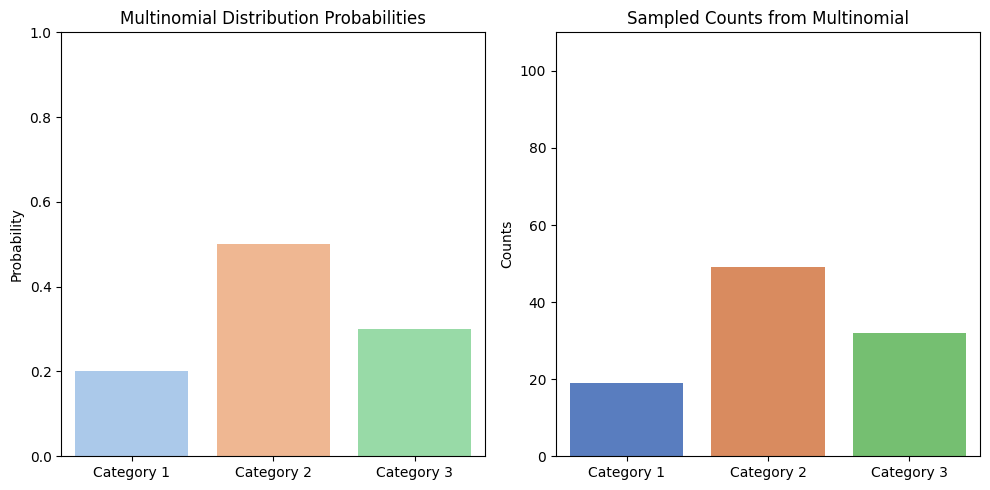

In [5]:

# Categories
categories = ['Category 1', 'Category 2', 'Category 3']

# Plot Multinomial Probabilities
plt.figure(figsize=(10, 5))

# Plot the true probabilities
plt.subplot(1, 2, 1)
sns.barplot(x=categories, y=theta, palette='pastel')
plt.title('Multinomial Distribution Probabilities')
plt.ylabel('Probability')
plt.ylim(0, 1)

# Plot the sampled counts
plt.subplot(1, 2, 2)
sns.barplot(x=categories, y=sample, palette='muted')
plt.title('Sampled Counts from Multinomial')
plt.ylabel('Counts')
plt.ylim(0, n_trials + 10)

plt.tight_layout()
plt.show()



Total valid points on simplex: 4966
Dirichlet Prior Parameters: [1.1 1.1 1.1]
Dirichlet Posterior Parameters: [11.1 21.1 31.1]


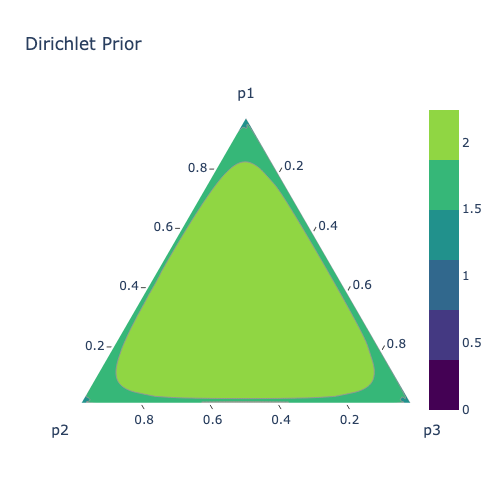

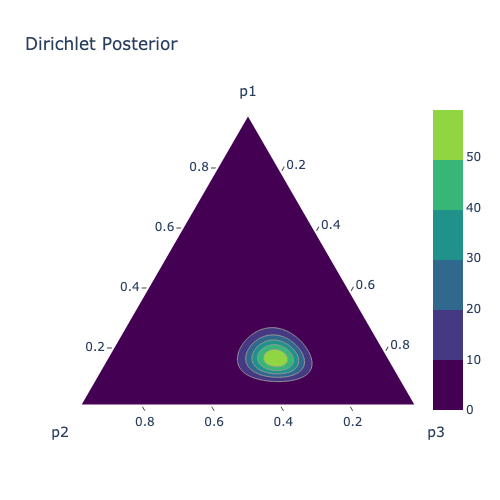

In [1]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import plotly.graph_objects as go
import skimage

# Function to generate a valid grid over the simplex
def generate_simplex_grid(n_points=100):
    """
    Generates a grid of points on the simplex p1 + p2 + p3 = 1.
    Ensures that p3 = 1 - p1 - p2 >= 0.
    """
    p1 = np.linspace(0, 1, n_points)
    p2 = np.linspace(0, 1, n_points)
    p1_grid, p2_grid = np.meshgrid(p1, p2)
    p1_flat = p1_grid.flatten()
    p2_flat = p2_grid.flatten()
    p3_flat = 1 - p1_flat - p2_flat

    # Filter out invalid points where p3 < 0
    valid_mask = p3_flat >= 0
    p1_valid = p1_flat[valid_mask]
    p2_valid = p2_flat[valid_mask]
    p3_valid = p3_flat[valid_mask]

    return np.vstack([p1_valid, p2_valid, p3_valid]).T

# Generate valid grid points
p = generate_simplex_grid(n_points=100)  # Generates (5151, 3) points approximately
print(f"Total valid points on simplex: {p.shape[0]}")

# Define Dirichlet prior parameters
alpha_prior = np.array([1.1, 1.1, 1.1])  # Slightly different from uniform
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

# Define observed counts (for posterior)
observed_counts = np.array([10, 20, 30])  # Example counts
alpha_posterior = alpha_prior + observed_counts  # Update posterior parameters
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

print(f"Dirichlet Prior Parameters: {alpha_prior}")
print(f"Dirichlet Posterior Parameters: {alpha_posterior}")

# Compute Dirichlet densities for each grid point
dens_prior = dirichlet_prior.pdf(p.T)
dens_posterior = dirichlet_posterior.pdf(p.T)

# Create ternary contour plot for Dirichlet Prior
fig_prior = ff.create_ternary_contour(
    p.T,
    dens_prior,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    colorscale='Viridis',
    title=dict(
        text='Dirichlet Prior'
    ))

# Create ternary contour plot for Dirichlet Posterior
fig_posterior = ff.create_ternary_contour(
    p.T,
    dens_posterior,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    colorscale='Viridis',
    title=dict(
        text='Dirichlet Posterior'
    ))

fig_prior.show("png")
fig_posterior.show("png")
